# k-means clustering - example 1

In this notebook, an example application of k-means is presented.

## Color Quantization

Color quantization aims at reducing the number of distinct colors used in an image. Usually, the point is also to keep the image as similar as possible to the original image.

This example is inspired from the opencv [documentation](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html).

Let us start by loading the original image:

type: <class 'numpy.ndarray'>
shape: (616, 794, 3)
data type: uint8


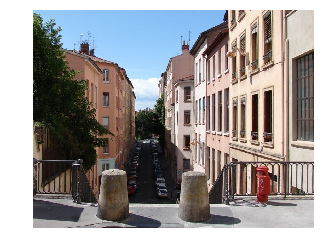

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

# loading the image with openCV
img = cv2.imread('home.jpg')
print("type:", type(img))
print("shape:", img.shape)
print("data type:", img.dtype)

# note that OpenCV represents RGB images as BGR...
# https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Now we compute $k$=10 color clusters with k-means and print the image with each color point assigned to its center.

97159 colors
10 colors


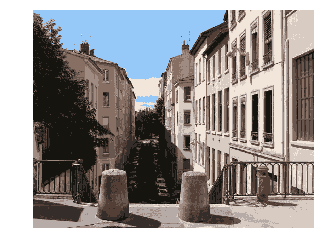

In [22]:
import numpy as np

# reshaping the image to a 3d vector, which length is the number n of observations
Z = img.reshape((-1,3))

# evaluate the number of different colors in the original image
print(len(np.unique(Z, axis=0)), "colors")

# convert to np.float32
Z = np.float32(Z)

# define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# define number of clusters k and apply kmeans()
k = 10
ret, label, center = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# now convert back into uint8, and use the centers as colors
center = np.uint8(center)
res = center[label.flatten()]

# evaluate the number of different colors in the new image
print(len(np.unique(res, axis=0)), "colors")
res2 = res.reshape((img.shape))

# display the image
plt.axis("off")
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))

Finally we compute different sets of clusters for $k$ = 2, 4, 8,... and display the corresponding images.

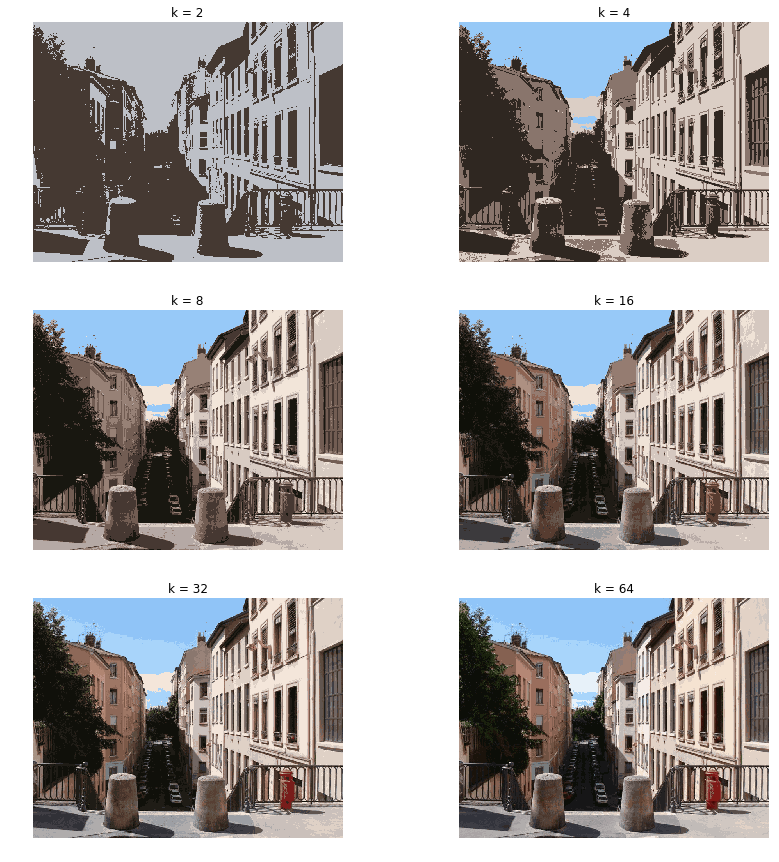

In [16]:
N = 3
M = 2
f, axarr = plt.subplots(N, M, sharex='col', sharey='row', figsize=(7*M, 5*N))

k = 2
for i in range(N):
    for j in range(M):
        ret, label, center = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        res = center[label.flatten()]
        res2 = res.reshape((img.shape))
        axarr[i,j].imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
        axarr[i,j].axis("off")
        axarr[i,j].set_title("k = "+str(k))
        k *= 2